# Overview

#### I am doing exploratory towards this dataset, here I am using sampling 10% plays dataset. from the data I learn that most of plays are coming from non premium users coming from some refferers and campaigns. it shows that there are still many opportunities to attract non-premium users to become premium users.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the Files

In [2]:
df = pd.read_csv('10% Vidio stream dataset.csv', error_bad_lines=False)

b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

# Data Cleaning and Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_film_id       40525 non-null   object 
 5   hash_event_id      742582 non-null  object 
 6   is_login           742582 non-null  bool   
 7   playback_location  742582 non-null  object 
 8   platform           742582 non-null  object 
 9   play_time          742582 non-null  object 
 10  end_time           742582 non-null  object 
 11  referrer           702119 non-null  object 
 12  average_bitrate    707495 non-null  float64
 13  bitrate_range      742582 non-null  object 
 14  total_bytes        742582 non-null  int64  
 15  buffer_duration    742582 non-null  float64
 16  re

###### Drop 'city' column cause its not containing data

In [4]:
df.drop('city', inplace=True, axis=1)

## NA data

In [5]:
nan_columns = [column for column in df.columns if df[column].isnull().sum() > 1]
print(df[nan_columns].isnull().mean()*100)

hash_film_id       94.542690
referrer            5.448961
average_bitrate     4.725000
completed          36.496979
utm_source         99.894288
utm_medium         99.894692
utm_campaign       99.955291
player_name         3.080468
flash_version      32.714232
os_name            31.689968
os_version          0.368175
browser_name       31.607149
browser_version    33.869391
autoplay           36.516775
app_version        67.454099
stream_type        63.503021
category_name      36.496979
film_title         94.544441
season_name        94.542690
genre_name         95.147876
dtype: float64


###### Based on na data, there are 3 types data which is Boolean data, numeric data and categorical data

###### Fill NA rows with False in boolean data

In [6]:
fillna_false = ['completed', 'autoplay']
for col in fillna_false:
    df[col].fillna(False, inplace=True)

###### Fill NA rows with 'unknown' in categorical data

In [7]:
fillna_unknown = [col for col in nan_columns if col not in ['average_bitrate']]
for col in fillna_unknown:
    df[col].fillna('unknown', inplace=True)

## Date Columns

###### Transform date columns to datetime format 

In [8]:
date_columns = ['play_time', 'end_time']
for col in date_columns:
    df[col] = pd.to_datetime(df[col]).dt.tz_localize(None)

###### Add new datetime columns based on 'play_time' column

In [9]:
df['date_play'] = df['play_time'].dt.date
df['day_names_play'] = df['play_time'].dt.day_name()
df['hour_play'] = df['play_time'].dt.hour

## Boolean data type

###### Transform boolean data type to object

In [10]:
bool_columns = [col for col in df.columns if df[col].dtypes == 'bool']
for col in bool_columns:
    df[col] = df[col].astype(str)

## Logical Approach

###### Make sure the 'end time' data happened after 'play_time' in the dataset

In [11]:
df = df[df['end_time'] > df['play_time']]

###### Make sure 'total_duration' as range of 'buffer_duration' and 'play_duration'

In [12]:
df['total_duration'] = df['end_time'] - df['play_time']
df['total_duration'] = df['total_duration']/np.timedelta64(1, 's')

In [13]:
df = df[(df['buffer_duration'] + df['play_duration']) <= df['total_duration']]

# Data Analysis

###### Divide the columns based on data type and the functionality

In [14]:
id_columns = ['hash_content_id', 'hash_play_id', 'hash_visit_id', 'hash_watcher_id', 'hash_film_id', 'hash_event_id']

In [15]:
date_time_columns = ['date_play', 'day_names_play', 'hour_play']

In [16]:
num_columns = [col for col in df.columns if df[col].dtypes != "O" and col not in date_columns + date_time_columns + id_columns]
num_discrete = [col for col in num_columns if len(df[col].unique()) <= 10]
num_continue = [col for col in num_columns if col not in num_discrete]

In [17]:
cat_columns = [col for col in df.columns if col not in date_columns + num_columns + date_time_columns + id_columns ]

## Categorical Columns

In [18]:
for col in cat_columns:
    print(col + ': {}'.format(len(df[col].unique())))

is_login: 2
playback_location: 2
platform: 7
referrer: 50864
bitrate_range: 3
referrer_group: 16
completed: 2
utm_source: 9
utm_medium: 7
utm_campaign: 12
player_name: 4
has_ad: 2
flash_version: 48
os_name: 15
os_version: 238
browser_name: 47
browser_version: 820
app_name: 3
autoplay: 2
is_premium: 2
app_version: 112
content_type: 3
stream_type: 3
title: 15289
category_name: 16
film_title: 475
season_name: 137
genre_name: 332


### Total Play on the categorical data

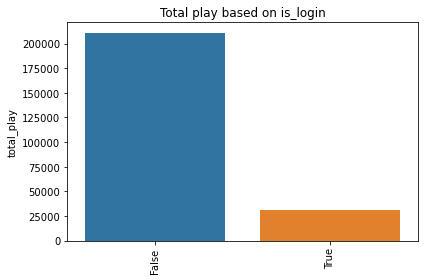

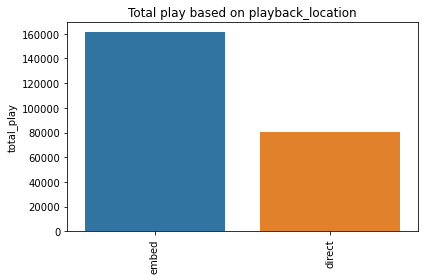

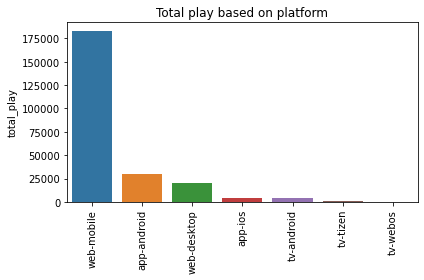

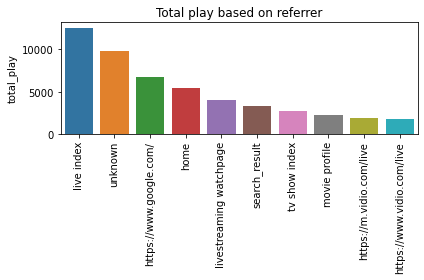

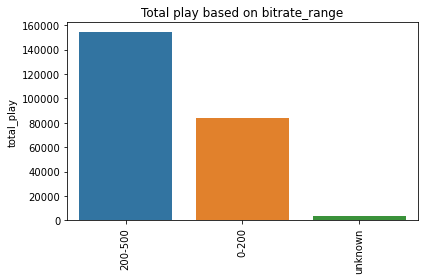

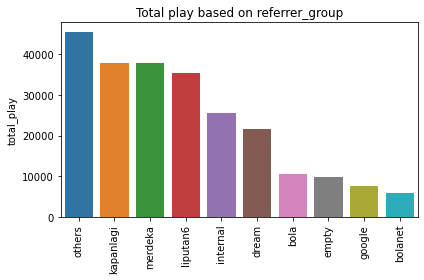

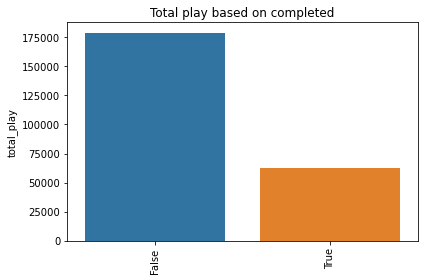

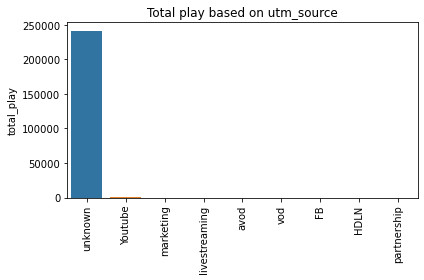

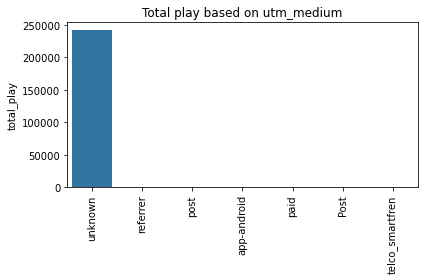

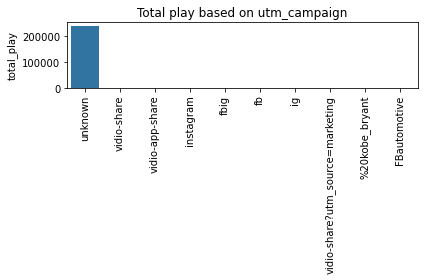

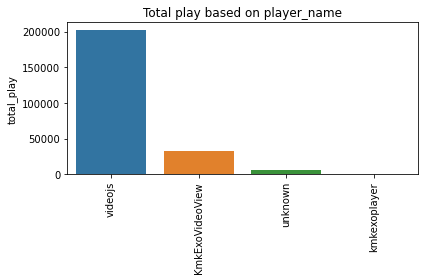

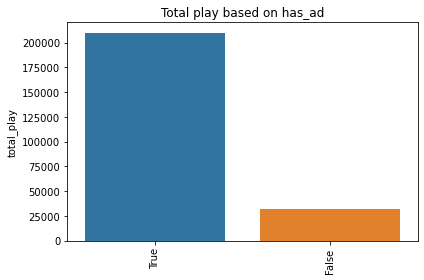

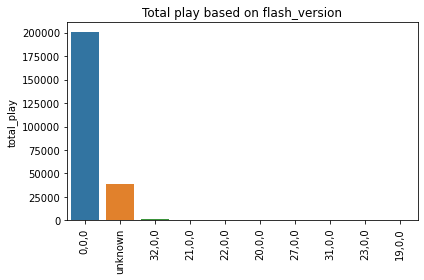

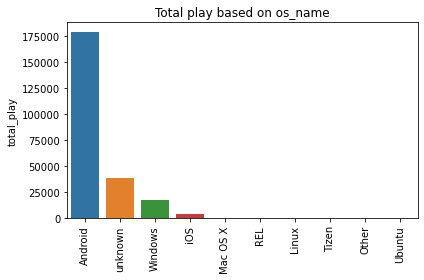

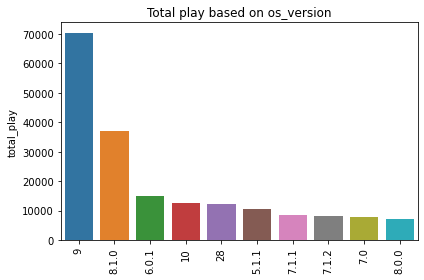

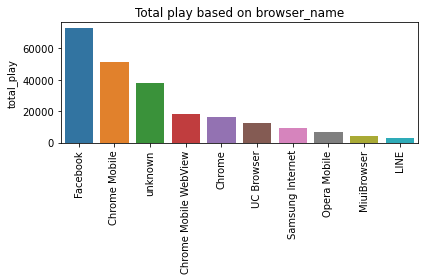

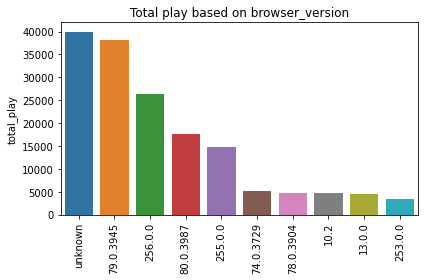

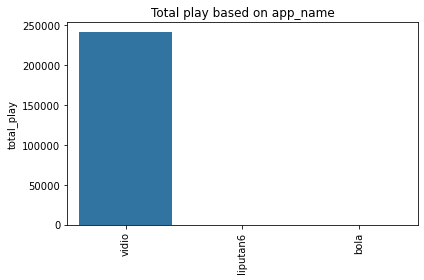

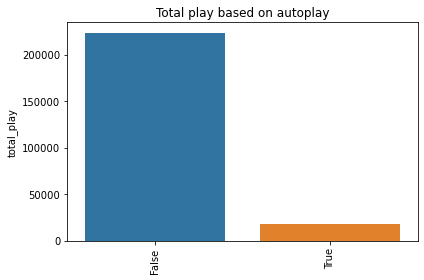

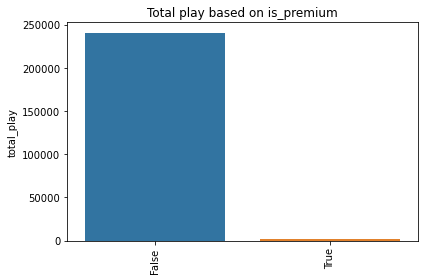

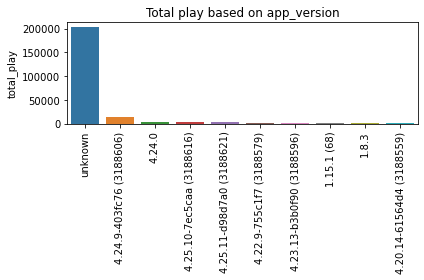

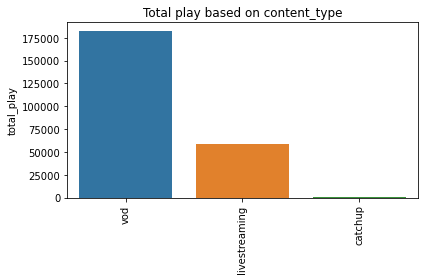

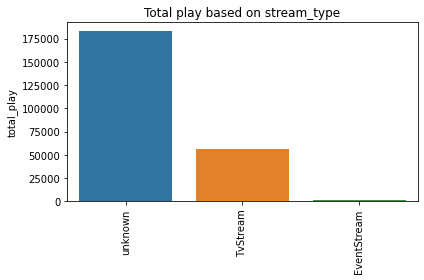

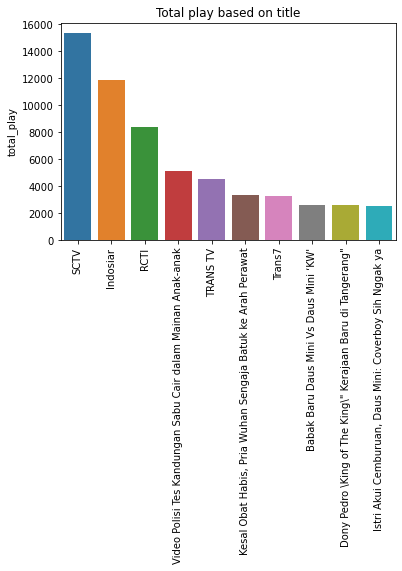

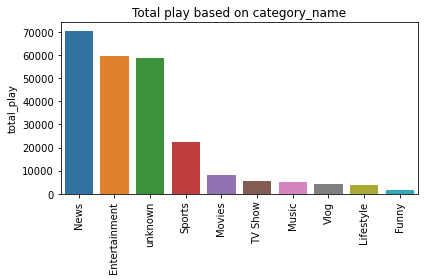

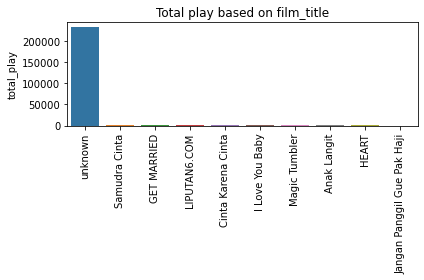

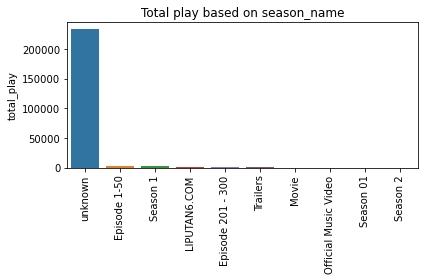

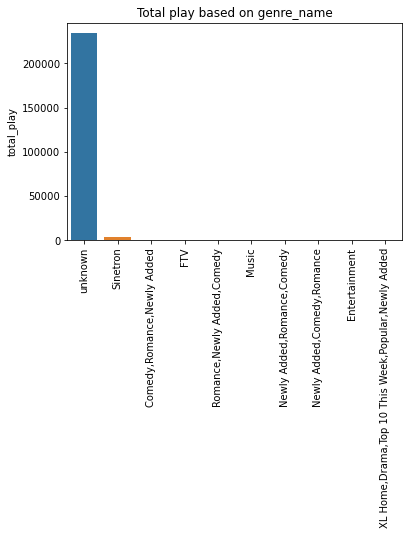

In [19]:
for col in cat_columns:
    plt.figure()
    data_vis = df.groupby([col]).size().reset_index(name='total_play').sort_values(by='total_play', ascending=False)
    lim_data_vis = data_vis[0:10]
    sns.barplot(data=lim_data_vis, x=col, y='total_play')
    plt.title('Total play based on ' + col)
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Total play mostly coming from another website (embed) not directly in the vidio webpage, with kapanlagi, merdeka, and liputan 6 as a top 3 referre_group streaming coming from. so thats why, most users are not login and not premium in the platform.

#### Mostly users coming from Android user using web-mobile platform like Facebook, Chrome Mobile, UC browser, etc

#### Popular content type is VOD (Video On Demand) with many different titles. whereas in livestreaming content type, SCTV is a top title with news and entertainment as top category. 

### Play duration on categorical data

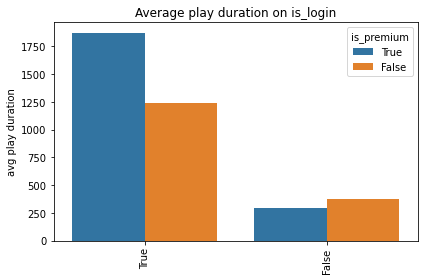

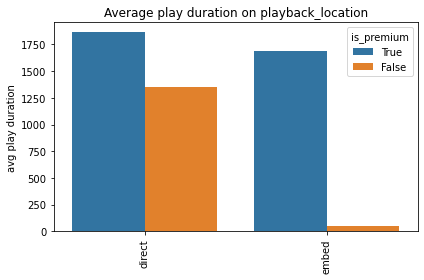

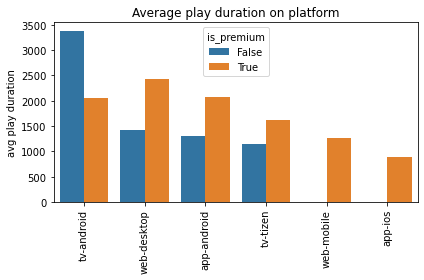

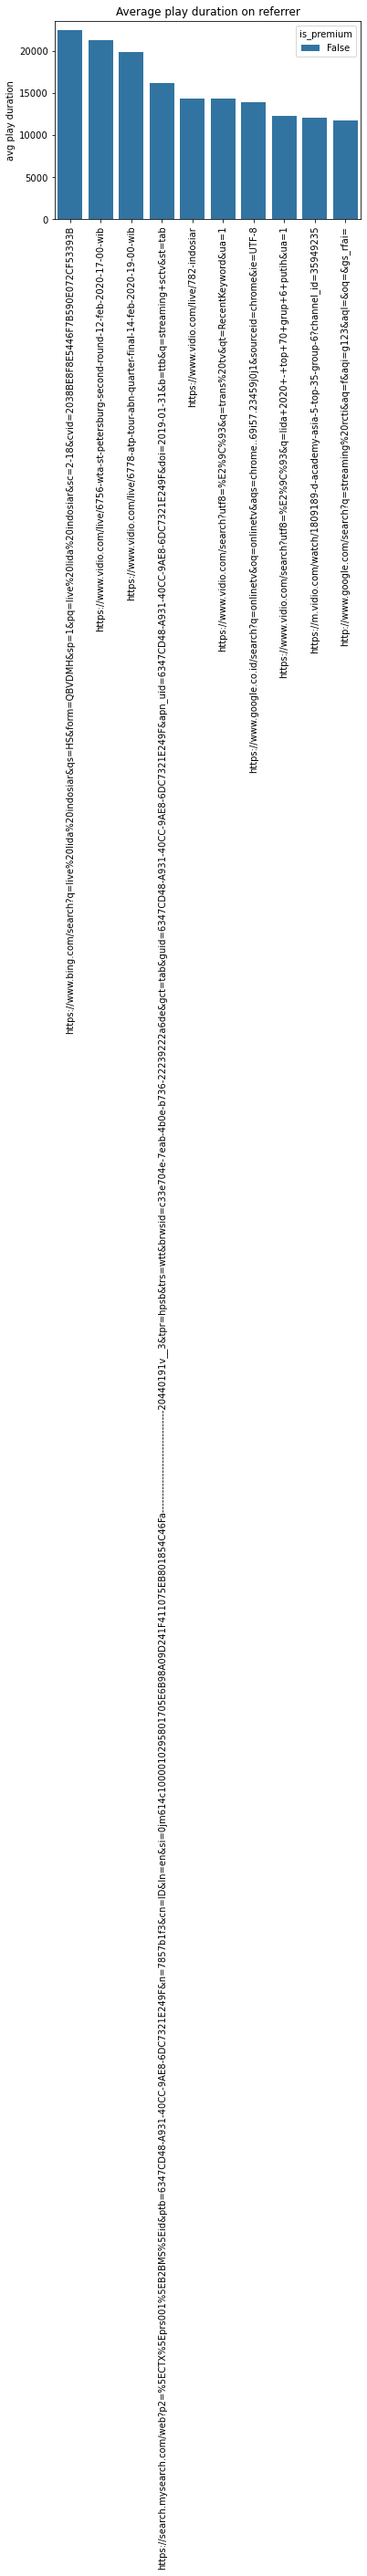

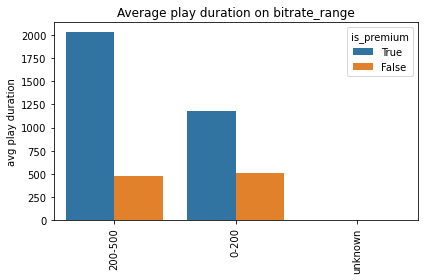

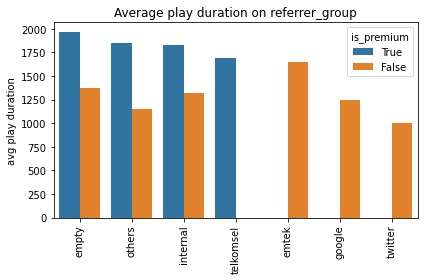

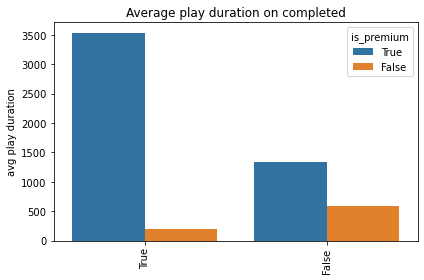

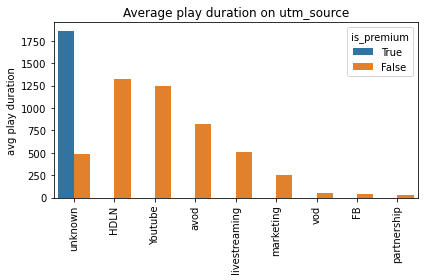

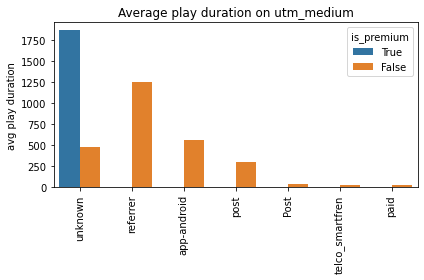

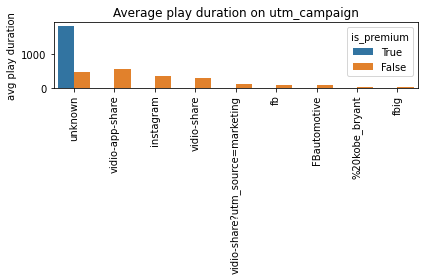

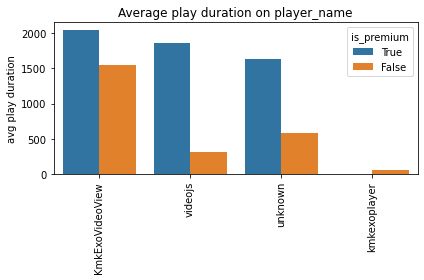

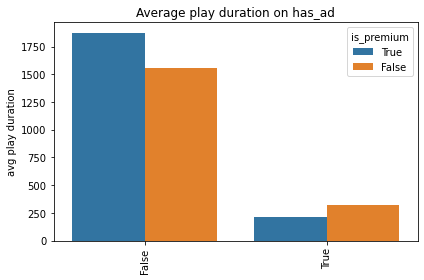

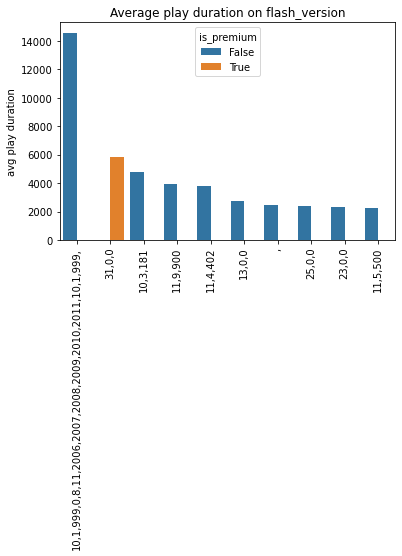

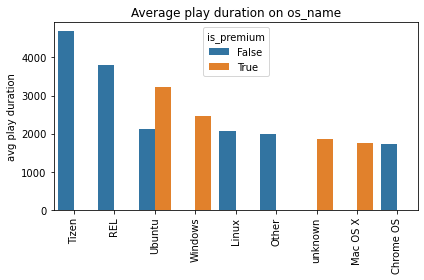

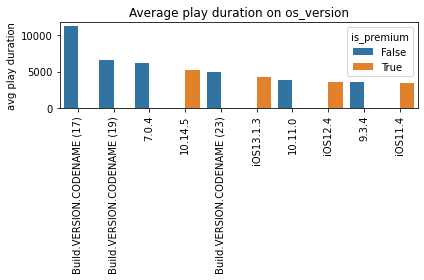

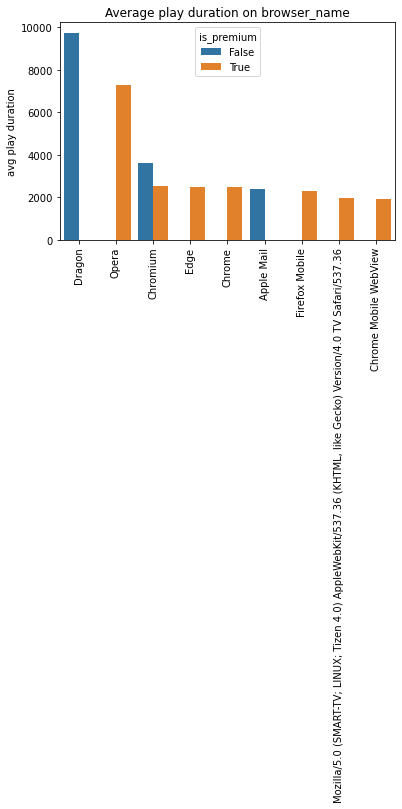

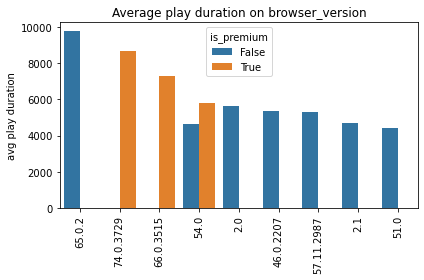

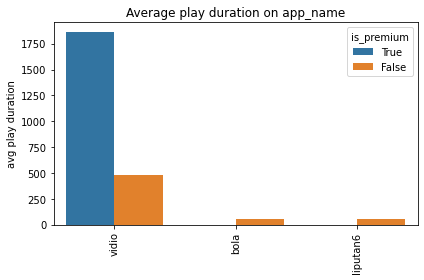

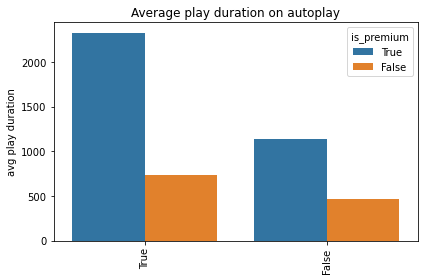

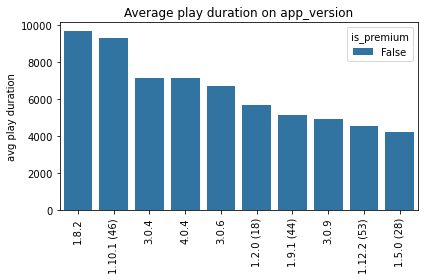

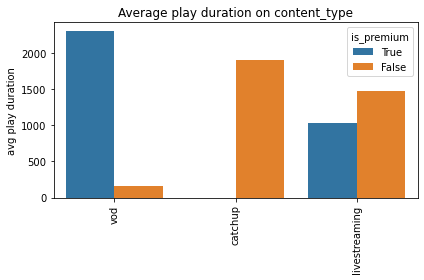

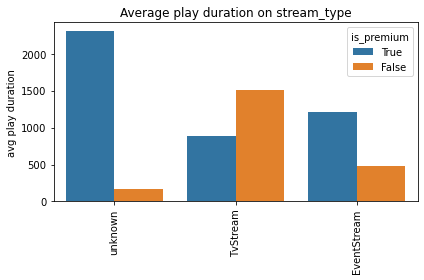

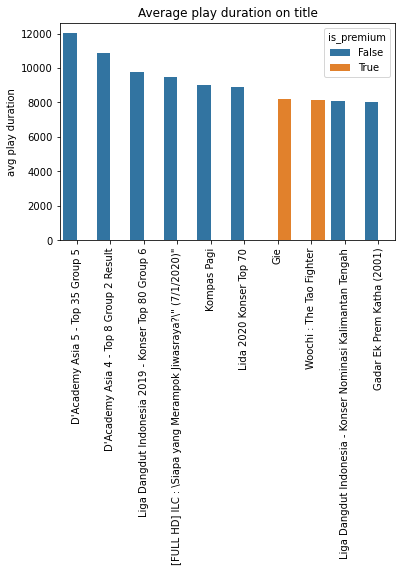

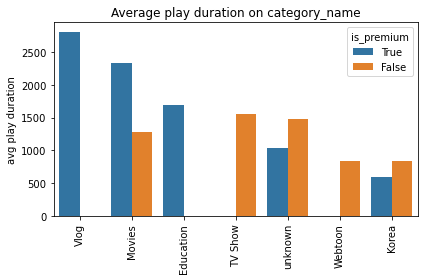

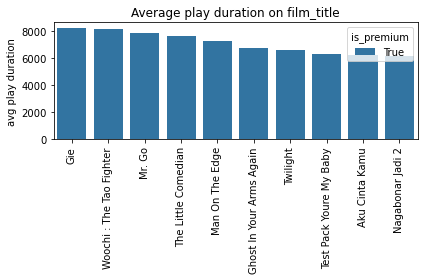

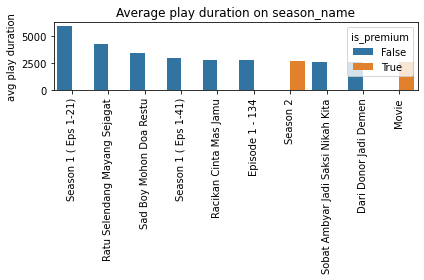

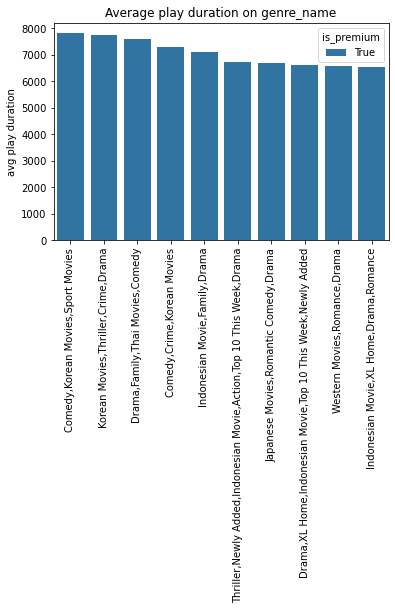

In [20]:
cat_prem_columns = [col for col in cat_columns if col not in ['is_premium']]

for col in cat_prem_columns:
    plt.figure()
    data_vis = df.groupby([col, 'is_premium'])['play_duration'].mean().reset_index(name='play_duration').sort_values(by='play_duration', ascending=False)
    lim_data_vis = data_vis[0:10]
    sns.barplot(data=lim_data_vis, x=col, y='play_duration', hue='is_premium')
    plt.title('Average play duration on ' + col)
    plt.ylabel('avg play duration')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Premium Users tend to stream using web-desktop, tv-android and app android as platform to stream. Most of them coming from organic traffic, its proff by referrer_group dominated by empty, others, and internal, and campaign source dominated by unknown (nan data). Favorite content_type of premium users is VOD followed by livestreaming.

#### Tv-android is a platform with the longer play duration for non premium user with emtek, internal and google as a top 3 sources the traffic coming from. The campaign contribute to the non premium user to play longer duration, the top 3 sources are HDLN, Youtube, and referrer. catchup is favorite content type for non premium users

## Numeric Columns

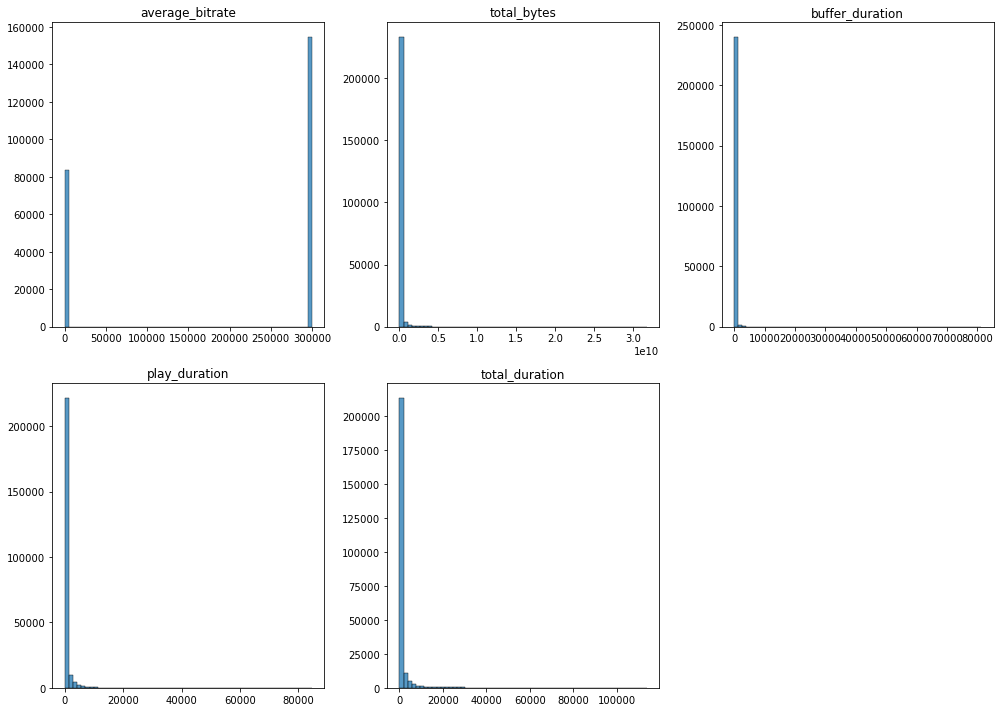

In [90]:
fig, axs = plt.subplots(2,3, figsize=(14,10))
i = 0
fig.delaxes(axs[1,2]) 
for col in num_continue:
    plt.subplot(2,3, i+1)
    sns.histplot(data=df, x=col, bins=60)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i += 1

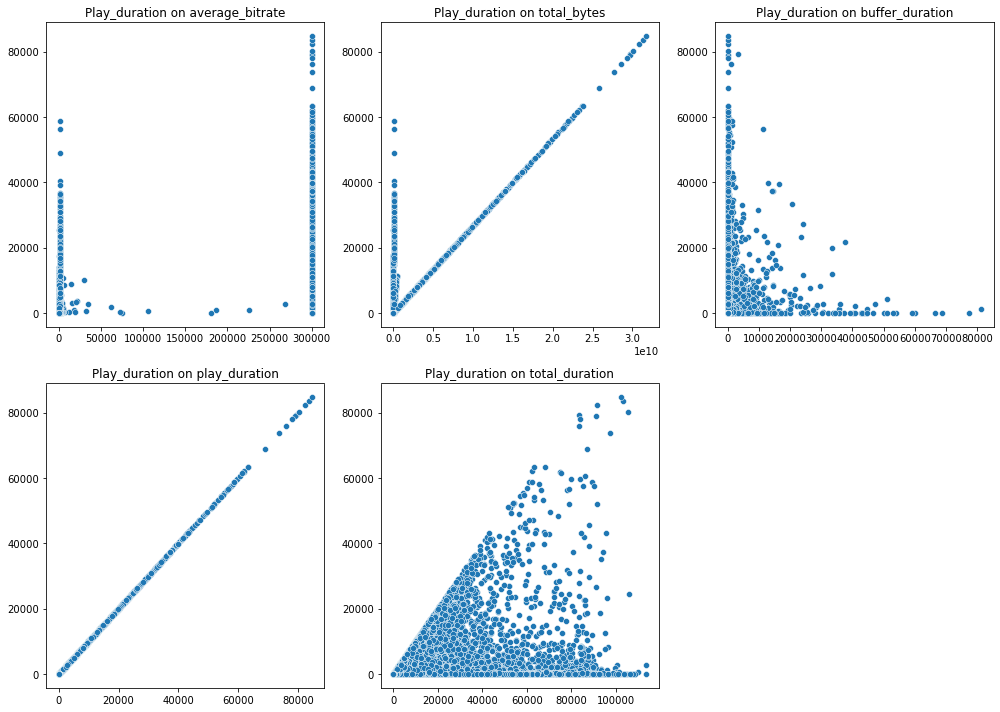

In [86]:
fig, axs = plt.subplots(2,3, figsize=(14,10))
i = 0
fig.delaxes(axs[1,2]) 
for col in num_continue:
    plt.subplot(2,3, i+1)
    sns.scatterplot(data=df, x=col, y='play_duration')
    plt.title('Play_duration on ' + col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i += 1

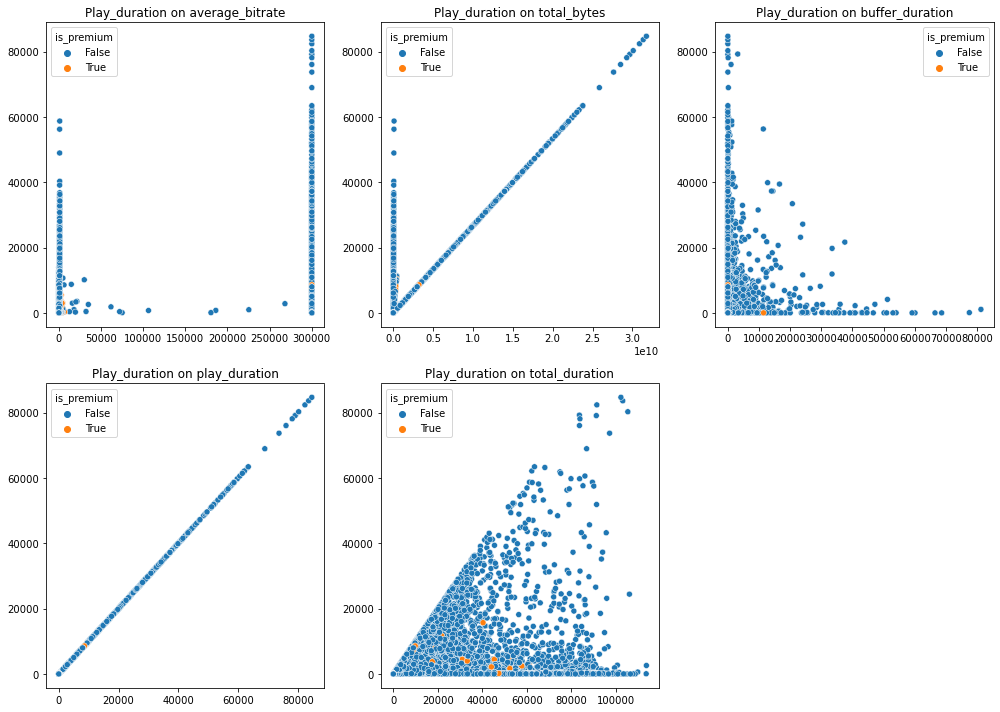

In [24]:
fig, axs = plt.subplots(2,3, figsize=(14,10))
i = 0
fig.delaxes(axs[1,2]) 
for col in num_continue:
    plt.subplot(2,3, i+1)
    sns.scatterplot(data=df, x=col, y='play_duration', hue='is_premium')
    plt.title('Play_duration on ' + col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    i += 1

#### There are just some facts such as more total_bytes increase the play_duration. its happened cause the longer play_duration, the more total_bytes is received. so there are no so much information from numerical columns.

## Date Time Columns

In [75]:
df['day_names_play'] = pd.Categorical(df['day_names_play'], categories=
    ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True)

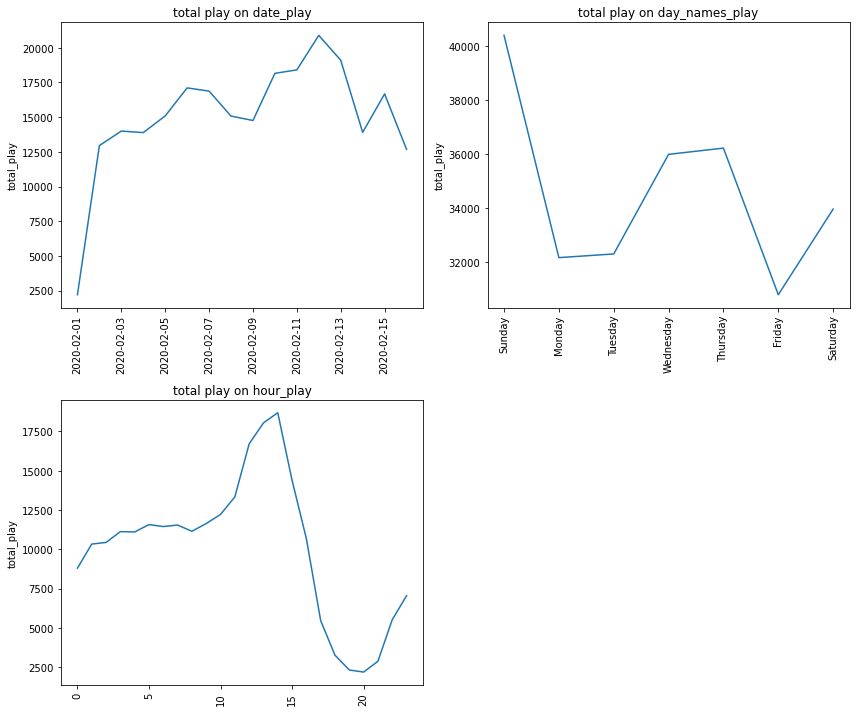

In [80]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
i = 0 
fig.delaxes(axs[1,1])
for col in date_time_columns:
    plt.subplot(2,2, i + 1)
    data_vis = df.groupby([col]).size().reset_index(name='total_play').sort_values(by='total_play', ascending=False)
    sns.lineplot(data=data_vis, x=col, y='total_play')
    plt.title('total play on ' + col)
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.tight_layout()
    i += 1

#### Total play in 15 days on February tends to be constant with peak at 12 february 2020. Sunday is the most play or stream happened followed by wednesday and thursday and at around 2PM at noon.

## Video Player Performance

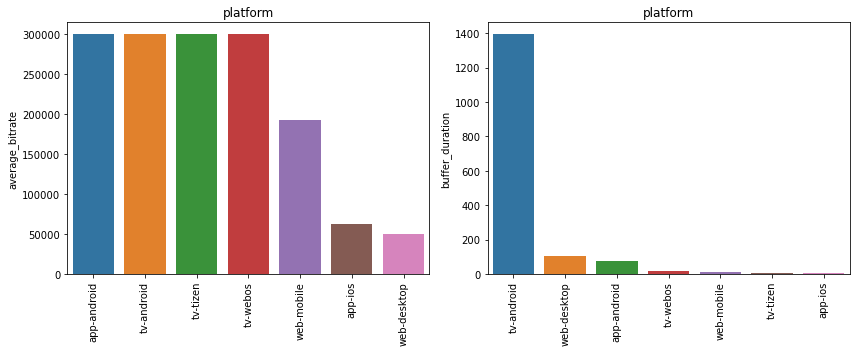

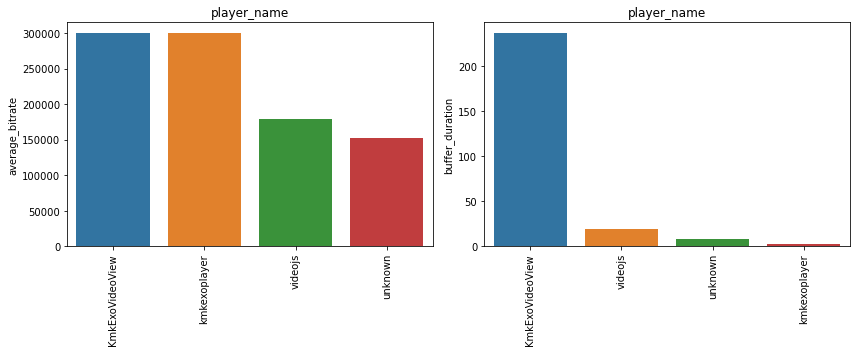

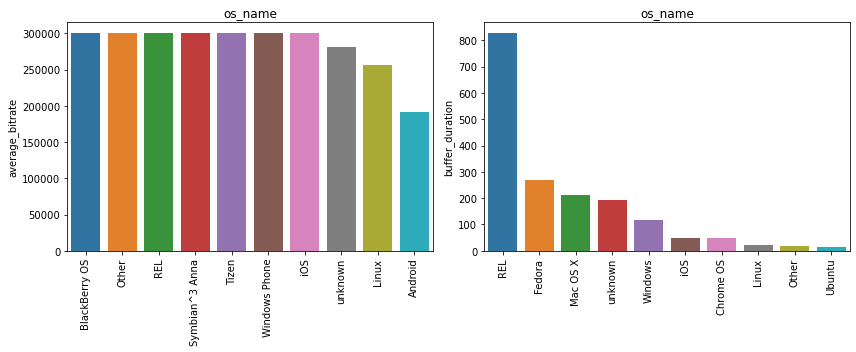

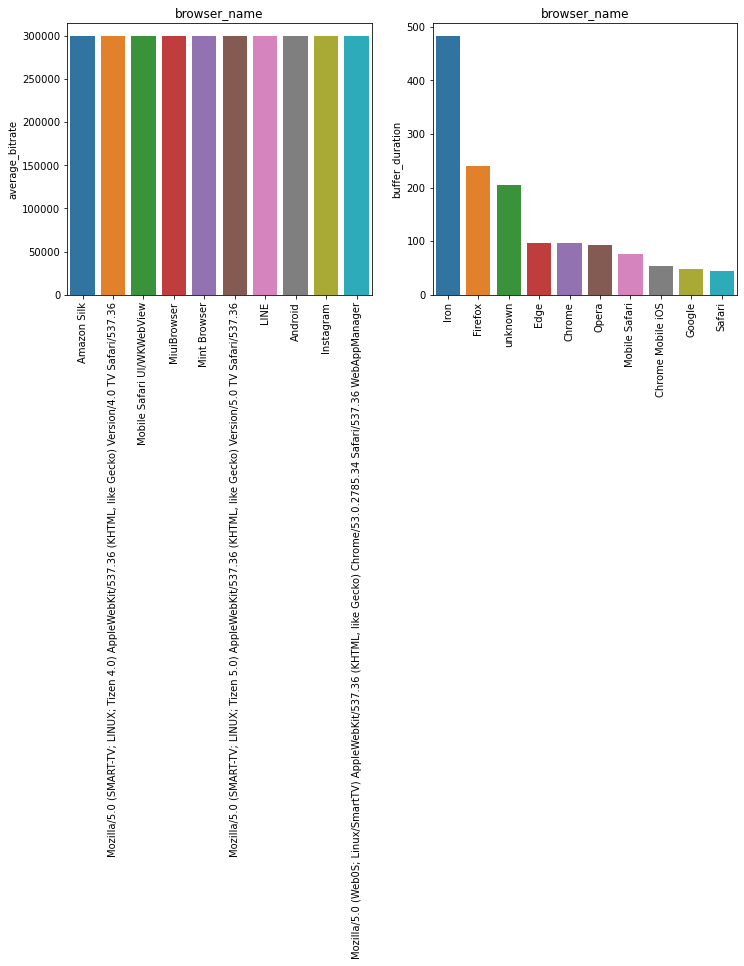

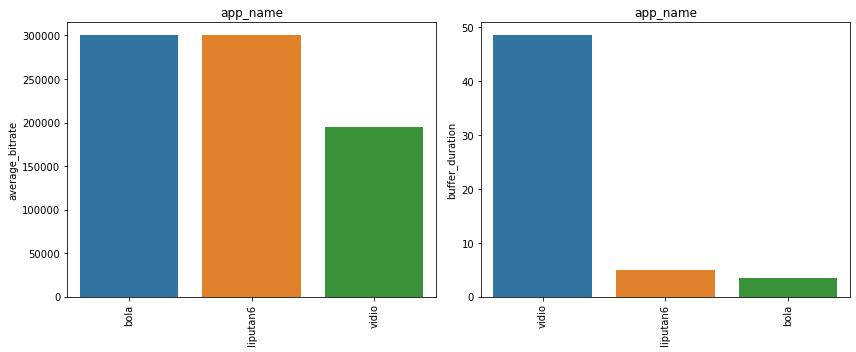

In [129]:
bit_check_columns = ['platform', 'player_name', 'os_name', 'browser_name', 'app_name']
for col in bit_check_columns:
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    data_vis = df.groupby([col])['average_bitrate'].mean().reset_index(name='average_bitrate').sort_values(by='average_bitrate', ascending=False)
    lim_data_vis = data_vis[0:10]
    sns.barplot(data=lim_data_vis, x=col, y='average_bitrate', ax=axs[0])
    data_vis2 = df.groupby([col])['buffer_duration'].mean().reset_index(name='buffer_duration').sort_values(by='buffer_duration', ascending=False)
    lim_data_vis2 = data_vis2[0:10]
    sns.barplot(data=lim_data_vis2, x=col, y='buffer_duration', ax=axs[1])
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.xlabel('')
    plt.tight_layout()

#### Bitrate tends to be good at app in android and smart tv version, but even with the good average bitrate, in tv-android buffer duration is still longer.

#### In the video player KmkExoVideoView is the effective video player with good average bitrate and less buffer duration.

#### REL is the worst os for buffer duration, cause its takes 800 seconds in average. In the mainstream browser, Chrome, Opera and safari are better than Firefox for less buffer duration

####  Its weird, official Vidio app is the slowest app than liputan6 and bola for load and play the video.

# Conclusion

### Total plays in first 15 days on February tend to be constant with peak on sunday. Most play are in embed (not direct) with less play duration, play by non premium users coming from some refferers and campaigns. It shows there are still many opportunities to attract non-premium users to become premium users. Whereas premium users tend to be play longer duration coming from organic traffic.